Сначала нужно определить какие столбцы мы хотим загрузить из нашей таблицы. 

Так, для моего примера мне нужны столбцы Volume(unit)(2), SurfaceArea (um2)(5) + количество строк.

Шаг1. Извлечение данных из xlsx в df, с которыми я смогу работать в python

glob - показывает пути к файлам с указанным расширением и сохраняет в переменную filepaths

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import pandas as pd
import numpy as np
import glob

Функция csv_to_xlsx считывает все файлы csv в папке, затем создает xlsx для каждого файла

In [82]:
def csv_to_xlsx():
    csv_search_string = '**/*.csv'
    csv_filepaths = glob.glob(csv_search_string, recursive=True)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=';', decimal = ',', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)
#csv_to_xlsx()

Функция file_extraction:
1. принимает в качестве параметра строку, по которой нужно искать названия файлов 
2. создает список путей к найденным файлам
3. создает пустой датафрейм
4. в цикле считывает файлы, загружает указанные столбцы и присоединяет их к датайрему методом outer.
5. возвращает полученный датафрейм


In [2]:
def file_extraction(search_string): 
    filepaths = glob.glob(search_string) 
    df = pd.DataFrame()
    col_name_suffix = 1
    for find_files in filepaths:
        df = df.join (pd.read_excel(find_files, usecols=[2,5]), how='outer',lsuffix=col_name_suffix,)
        col_name_suffix +=1 
    return(df)

Шаг2. Извлекаем в отдельные датафреймы все имеющиеся данные по каждому животному в контроле и при эпилепсии (N1-N6)

In [3]:
N1_gs_glt_ctrl = file_extraction('**/N1*.xlsx')
N2_gs_glt_ctrl = file_extraction('**/N2*.xlsx')
N3_gs_glt_ctrl = file_extraction('**/N3*.xlsx')
N4_gs_glt_ctrl = file_extraction('**/N4*.xlsx')
N5_gs_glt_ctrl = file_extraction('**/N5*.xlsx')
#N6_gs_glt_ctrl = file_extraction('**/N6*.xlsx') 

N1_gs_glt_SE = file_extraction('**/N1*SE*.xlsx')
N2_gs_glt_SE = file_extraction('**/N2*SE*.xlsx')
N3_gs_glt_SE = file_extraction('**/N3*SE*.xlsx')
N4_gs_glt_SE = file_extraction('**/N4*SE*.xlsx')
N5_gs_glt_SE = file_extraction('**/N5*SE*.xlsx')
N6_gs_glt_SE = file_extraction('**/N6*SE*.xlsx')

Можно посмотреть описательные статистики для каждого из датафреймов. 

In [85]:
#N1_gs_glt_ctrl.describe(include='all')
#N2_gs_glt_ctrl.describe(include='all')
#N3_gs_glt_ctrl.describe(include='all')
#N4_gs_glt_ctrl.describe(include='all')
#N5_gs_glt_ctrl.describe(include='all')

#N1_gs_glt_SE.describe(include='all')
#N2_gs_glt_SE.describe(include='all')
#N3_gs_glt_SE.describe(include='all')
#N4_gs_glt_SE.describe(include='all')
#N5_gs_glt_SE.describe(include='all')
#N6_gs_glt_SE.describe(include='all')

,Volume (unit)2,SurfaceArea2,Volume (unit),SurfaceArea
count,3442.000000,3442.000000,2834.000000,2834.000000
mean,0.416082,4.296719,0.432251,4.444777
std,0.278170,2.089218,0.294942,2.181343
min,0.010000,0.314000,0.010000,0.314000
25%,0.200000,2.718000,0.213000,2.799750
50%,0.365000,4.122000,0.378000,4.199000
75%,0.578000,5.686500,0.591000,5.862000
max,1.751000,13.699000,2.352000,16.191000


Нужно получить значения количества кластеров для каждого животного - это количество строк в каждом столбце датафрейма, кроме Null

In [4]:
N1_num_glt_clusters = pd.DataFrame(N1_gs_glt_ctrl.count().iloc[::2])
N2_num_glt_clusters = pd.DataFrame(N2_gs_glt_ctrl.count().iloc[::2])
N3_num_glt_clusters = pd.DataFrame(N3_gs_glt_ctrl.count().iloc[::2])
N4_num_glt_clusters = pd.DataFrame(N4_gs_glt_ctrl.count().iloc[::2])
N5_num_glt_clusters = pd.DataFrame(N5_gs_glt_ctrl.count().iloc[::2])

N1_SE_num_glt_clusters = pd.DataFrame(N1_gs_glt_SE.count().iloc[::2])
N2_SE_num_glt_clusters = pd.DataFrame(N2_gs_glt_SE.count().iloc[::2])
N3_SE_num_glt_clusters = pd.DataFrame(N3_gs_glt_SE.count().iloc[::2])
N4_SE_num_glt_clusters = pd.DataFrame(N4_gs_glt_SE.count().iloc[::2])
N5_SE_num_glt_clusters = pd.DataFrame(N5_gs_glt_SE.count().iloc[::2])
N6_SE_num_glt_clusters = pd.DataFrame(N6_gs_glt_SE.count().iloc[::2])

Полученные значения количества кластеров определяем в отдельный датафрейм.

In [21]:
values_ctrl = [N1_num_glt_clusters,N2_num_glt_clusters, N3_num_glt_clusters,N4_num_glt_clusters, N5_num_glt_clusters] 
glt_num_ctrl = pd.concat(values_ctrl)
values_SE = [N1_SE_num_glt_clusters,N2_SE_num_glt_clusters, N3_SE_num_glt_clusters, N4_SE_num_glt_clusters, N5_SE_num_glt_clusters,N6_SE_num_glt_clusters] 
glt_num_SE = pd.concat(values_SE)

glt_num_SE.rename({0: 'ЭС'}, axis=1)
glt_num_ctrl.rename({0: 'Контроль'}, axis=1)

all_glt_num = glt_num_ctrl.join( glt_num_SE,  lsuffix='_ctrl', rsuffix='_se', how = 'outer')


<AxesSubplot:>

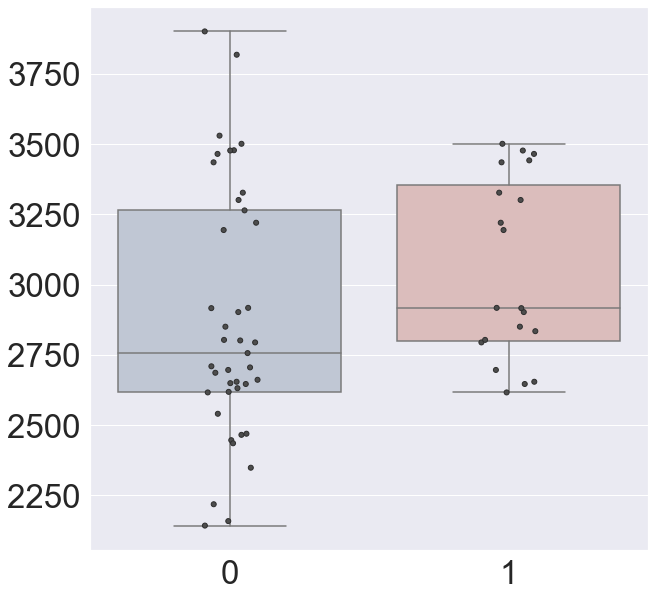

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10)) # меняет размер графика
sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set(font_scale=3)
sns.boxplot(data = [all_glt_num_ctrl, all_glt_num_SE], palette="vlag")
sns.stripplot(data=[all_glt_num_ctrl, all_glt_num_SE],
              size=5, color=".3", linewidth=1, jitter = True) #добавляет "горошки"


#columns = ['Контроль', 'ЭС'],

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(all_cell_vol(N1_stack1_cell1_Volume (unit) ) )
#all_cell_vol = pd.concat([N11_cell_volume, N12_cell_volume], ignore_index=True, sort=False)
#all_cell_vol = N11_cell_volume + N12_cell_volume
#all_cell_vol.fillna(0)
#plt.hist(all_cell_vol, bins = 4)
#all_cell_vol[all_cell_vol > 0.01].hist(bins=10)
all_cell_vol.columns
